In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox
import warnings
warnings.filterwarnings('ignore')

In [32]:
##

## Data Gathering

In [33]:
df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [35]:
df['Sex'].value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [36]:
df['Sex'].replace({'M':1, 'F':0}, inplace = True)

In [37]:
df['BP'].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [38]:
df['BP'].replace({'HIGH':2, 'LOW':1, 'NORMAL':0}, inplace = True)

In [39]:
df['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [40]:
df['Cholesterol'].replace({'HIGH':1, 'NORMAL':0}, inplace = True)

In [41]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [42]:
#df = pd.get_dummies(df['Drug'], dtype=int)


In [43]:
#df['Drug'].replace({'DrugY':5, 'drugX':4, 'drugA':1,'drugC':3, 'drugB':2}, inplace = True)

In [44]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,DrugY
1,47,1,1,1,13.093,drugC
2,47,1,1,1,10.114,drugC
3,28,0,0,1,7.798,drugX
4,61,0,1,1,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,1,1,11.567,drugC
196,16,1,1,1,12.006,drugC
197,52,1,0,1,9.894,drugX
198,23,1,0,0,14.020,drugX


## Feature Engineering

<Axes: >

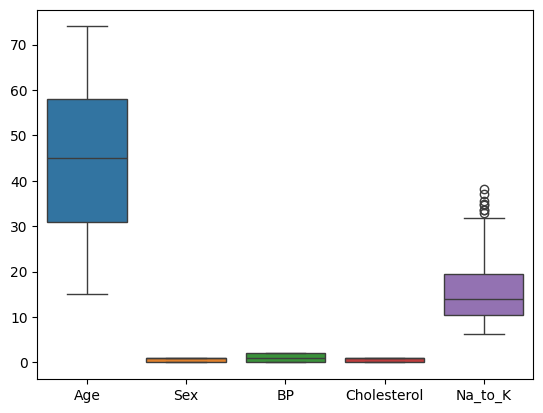

In [45]:
sns.boxplot(df)

In [46]:
array1 = boxcox (df['Na_to_K'])[0]
array1

array([1.92852561, 1.69061513, 1.58153756, 1.46114097, 1.81298153,
       1.50814512, 1.77512928, 1.61955487, 1.74854669, 1.83820491,
       1.64669991, 1.83511952, 1.75367706, 1.86529473, 1.67834587,
       1.75712786, 1.63538487, 1.71654022, 1.42865435, 1.93620274,
       1.83381231, 1.93550619, 1.9863634 , 1.74511665, 2.0132121 ,
       1.82785702, 1.98437707, 1.54783449, 1.89242663, 1.81113748,
       1.51583355, 1.55671617, 1.61866036, 1.99880924, 1.72105014,
       1.42776977, 1.55091724, 1.71557882, 1.56334104, 1.53314706,
       1.83552324, 1.72398164, 1.76376123, 1.66377577, 1.66495266,
       1.47984164, 1.69055348, 1.58918343, 1.99704464, 1.84585851,
       1.8390746 , 1.61411008, 1.95050687, 1.82112504, 1.58479927,
       1.72179966, 1.63110858, 1.95776856, 1.58053074, 1.82584783,
       1.97947349, 1.55235256, 1.86119593, 1.49501453, 1.69701877,
       1.9489758 , 1.68321917, 1.61149177, 1.91957172, 1.91451783,
       1.71639903, 1.84371762, 1.60231898, 1.89545387, 1.79278

In [47]:
df['Na_to_K']= array1
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,1.928526,DrugY
1,47,1,1,1,1.690615,drugC
2,47,1,1,1,1.581538,drugC
3,28,0,0,1,1.461141,drugX
4,61,0,1,1,1.812982,DrugY
...,...,...,...,...,...,...
195,56,0,1,1,1.639494,drugC
196,16,1,1,1,1.655097,drugC
197,52,1,0,1,1.571778,drugX
198,23,1,0,0,1.717892,drugX


<Axes: >

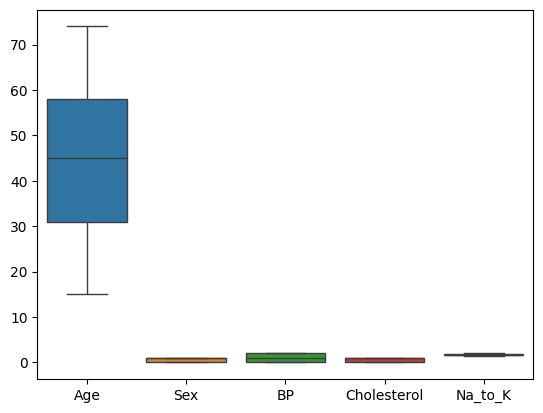

In [48]:
sns.boxplot(df)

## Feature Selection

In [49]:
x = df.drop('Drug', axis=1)
y = df['Drug']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=1,stratify = y)

In [50]:
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [51]:
log_reg = LogisticRegression(multi_class='ovr')
log_reg.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

## Data Evaluation

In [52]:
# training data evaluation
y_train_pred = log_reg.predict(x_train)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_train, y_train_pred)
print("Multilabel Confusion Matrix:\n", multilabel_cnf_matrix)
print("*"*30)
cnf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*30)

clf_report = classification_report(y_train, y_train_pred)
print("Classification Report :\n", clf_report)

Multilabel Confusion Matrix:
 [[[ 51  25]
  [  4  60]]

 [[123   1]
  [  6  10]]

 [[129   0]
  [  4   7]]

 [[129   0]
  [ 11   0]]

 [[ 96   6]
  [  7  31]]]
******************************
Confusion Matrix:
 [[60  1  0  0  3]
 [ 6 10  0  0  0]
 [ 4  0  7  0  0]
 [ 8  0  0  0  3]
 [ 7  0  0  0 31]]
******************************
Classification Report :
               precision    recall  f1-score   support

       DrugY       0.71      0.94      0.81        64
       drugA       0.91      0.62      0.74        16
       drugB       1.00      0.64      0.78        11
       drugC       0.00      0.00      0.00        11
       drugX       0.84      0.82      0.83        38

    accuracy                           0.77       140
   macro avg       0.69      0.60      0.63       140
weighted avg       0.73      0.77      0.74       140



In [53]:
# testing data evaluation
y_pred_test = log_reg.predict(x_test)

multilabel_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred_test)
print("Multilabel Confusion Matrix:\n", multilabel_cnf_matrix)
print("*"*30)
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*30)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report :\n", clf_report)

Multilabel Confusion Matrix:
 [[[18 15]
  [ 2 25]]

 [[53  0]
  [ 5  2]]

 [[54  1]
  [ 3  2]]

 [[55  0]
  [ 5  0]]

 [[43  1]
  [ 2 14]]]
******************************
Confusion Matrix:
 [[25  0  1  0  1]
 [ 5  2  0  0  0]
 [ 3  0  2  0  0]
 [ 5  0  0  0  0]
 [ 2  0  0  0 14]]
******************************
Classification Report :
               precision    recall  f1-score   support

       DrugY       0.62      0.93      0.75        27
       drugA       1.00      0.29      0.44         7
       drugB       0.67      0.40      0.50         5
       drugC       0.00      0.00      0.00         5
       drugX       0.93      0.88      0.90        16

    accuracy                           0.72        60
   macro avg       0.64      0.50      0.52        60
weighted avg       0.70      0.72      0.67        60



In [54]:
y_train_prob = log_reg.predict_proba(x_train)

In [55]:
y_train_prob

array([[3.63868683e-01, 1.10788465e-01, 4.07132488e-01, 2.22619340e-02,
        9.59484302e-02],
       [6.89228933e-01, 2.36243914e-01, 6.80558709e-03, 1.87579277e-02,
        4.89636377e-02],
       [5.06146430e-01, 3.42221001e-01, 1.62883808e-02, 2.91310480e-02,
        1.06213140e-01],
       [2.67142778e-01, 4.73302210e-01, 3.55970445e-02, 1.95439252e-01,
        2.85187160e-02],
       [4.74960834e-01, 3.41441310e-02, 2.86421715e-02, 3.59600762e-02,
        4.26292787e-01],
       [5.05694503e-01, 1.14231505e-01, 2.80577524e-01, 2.10062975e-02,
        7.84901707e-02],
       [5.13608294e-01, 3.12966407e-03, 2.26969429e-04, 8.23213225e-02,
        4.00713750e-01],
       [2.42732629e-01, 3.34281698e-01, 2.41887917e-01, 4.64510080e-02,
        1.34646748e-01],
       [3.42779696e-01, 4.72769268e-01, 2.99174769e-02, 4.51047284e-02,
        1.09428831e-01],
       [4.43883353e-01, 2.74925851e-02, 9.99150835e-03, 2.54641226e-02,
        4.93168431e-01],
       [7.04762605e-01, 2.0575

In [56]:
log_reg.predict(x_train)

array(['drugB', 'DrugY', 'DrugY', 'drugA', 'DrugY', 'DrugY', 'DrugY',
       'drugA', 'drugA', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'drugX', 'DrugY', 'DrugY', 'drugX', 'DrugY',
       'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugA', 'DrugY',
       'drugB', 'drugX', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'drugA', 'DrugY',
       'drugX', 'drugX', 'drugX', 'drugB', 'DrugY', 'DrugY', 'drugX',
       'DrugY', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugB', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugA',
       'DrugY', 'DrugY', 'drugX', 'DrugY', 'drugX', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'DrugY', 'drugA', 'DrugY', 'DrugY', 'drugA', 'DrugY', 'drugX',
       'drugA', 'drugX', 'DrugY', 'drugX', 'drugB', 'DrugY', 'drugX',
       'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugX', 'drugX', 'DrugY',
       'drugX', 'dru

In [57]:
import pickle

In [58]:
with open('drug_log_regre.pkl', 'wb') as f:
    pickle.dump(log_reg,f)

In [59]:
import json

In [60]:
column_data = {
                "Sex": {'M':1, 'F':0},
                "BP" : {'HIGH':2, 'LOW':1, 'NORMAL':0},
                "Cholesterol" : {'HIGH':1, 'NORMAL':0}
                #"Drug" : {'DrugY':5, 'drugX':4, 'drugA':1,'drugC':3, 'drugB':2},
                }
with open("column_data.json", 'w') as f:
    json.dump(column_data,f)